# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [ ]:
# Code Here
!pip install palmerpenguins
!pip install scikit-learn

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from plotnine import *

In [ ]:
penguins = load_penguins()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
penguins = penguins.dropna()

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [ ]:
# Code Here

X = penguins.drop(["species"], axis = 1)
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

####Processing

In [ ]:
#Create our preprocessing step

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

####KNN

In [ ]:
knn_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors=5))]
)

In [ ]:
knn_pipeline_fitted_1 = knn_pipeline_1.fit(X_train, y_train)
y_preds_1 = knn_pipeline_fitted_1.predict(X_test)

In [ ]:
knn_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors=15))]
)

In [ ]:
knn_pipeline_fitted_2 = knn_pipeline_2.fit(X_train, y_train)
y_preds_2 = knn_pipeline_fitted_2.predict(X_test)

####Confusion Matrix for KNN

In [ ]:
knn_confusion_matrix_1 = confusion_matrix(y_test, y_preds_1)
knn_confusion_matrix_2 = confusion_matrix(y_test, y_preds_2)

In [ ]:
print(knn_confusion_matrix_1, "\n", "\n", knn_confusion_matrix_2)

[[33  0  0]
 [ 1 28  0]
 [ 0  0 22]] 
 
 [[33  0  0]
 [ 2 27  0]
 [ 0  0 22]]


####Accuracy Score for KNN

In [ ]:
knn_accuracy_score_1 = accuracy_score(y_test, y_preds_1)
knn_accuracy_score_2 = accuracy_score(y_test, y_preds_2)

In [ ]:
print(knn_accuracy_score_1, "\n", "\n", knn_accuracy_score_2)

0.9880952380952381 
 
 0.9761904761904762


####Precision Score for KNN

In [ ]:
knn_precision_score_1 = precision_score(y_test, y_preds_1, average = None)
knn_precision_score_2 = precision_score(y_test, y_preds_2, average = None)

In [ ]:
print(knn_precision_score_1, "\n", "\n", knn_precision_score_2)

[0.97058824 1.         1.        ] 
 
 [0.94285714 1.         1.        ]


####Recall KNN

In [ ]:
knn_recall_score_1 = recall_score(y_test, y_preds_1, average = None)
knn_recall_score_2 = recall_score(y_test, y_preds_2, average = None)

In [ ]:
print(knn_recall_score_1, "\n", "\n", knn_recall_score_2)

[1.         0.96551724 1.        ] 
 
 [1.         0.93103448 1.        ]


####General Report + F1 Score KNN

In [ ]:
report_knn_1 = classification_report(y_test, y_preds_1)
report_knn_1

'              precision    recall  f1-score   support\n\n      Adelie       0.97      1.00      0.99        33\n   Chinstrap       1.00      0.97      0.98        29\n      Gentoo       1.00      1.00      1.00        22\n\n    accuracy                           0.99        84\n   macro avg       0.99      0.99      0.99        84\nweighted avg       0.99      0.99      0.99        84\n'

In [ ]:
report_knn_2 = classification_report(y_test, y_preds_2)
report_knn_2

'              precision    recall  f1-score   support\n\n      Adelie       0.94      1.00      0.97        33\n   Chinstrap       1.00      0.93      0.96        29\n      Gentoo       1.00      1.00      1.00        22\n\n    accuracy                           0.98        84\n   macro avg       0.98      0.98      0.98        84\nweighted avg       0.98      0.98      0.98        84\n'

####ROC & AUC KNN

In [ ]:
prob_knn_1 = knn_pipeline_fitted_1.predict_proba(X_test)
roc_auc_knn_1 = roc_auc_score(y_test, prob_knn_1, multi_class='ovr')
roc_auc_knn_1

0.9997964772812643

In [ ]:
prob_knn_2 = knn_pipeline_fitted_2.predict_proba(X_test)
roc_auc_knn_2 = roc_auc_score(y_test, prob_knn_2, multi_class='ovr')
roc_auc_knn_2

1.0

###Decision Tree

In [ ]:
decision_tree_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("decision_tree_regression", DecisionTreeClassifier(min_samples_leaf = 3))]
)

decision_tree_pipeline_fitted_1 = decision_tree_pipeline_1.fit(X_train, y_train)
y_preds_3 = decision_tree_pipeline_fitted_1.predict(X_test)

In [ ]:
decision_tree_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("decision_tree_regression", DecisionTreeClassifier(min_samples_leaf = 6))]
)

decision_tree_pipeline_fitted_2 = decision_tree_pipeline_2.fit(X_train, y_train)
y_preds_4 = decision_tree_pipeline_fitted_2.predict(X_test)

####Confusion Matrix for Decision Tree

In [ ]:
decision_tree_confusion_matrix_1 = confusion_matrix(y_test, y_preds_3)
decision_tree_confusion_matrix_2 = confusion_matrix(y_test, y_preds_4)

In [ ]:
print(decision_tree_confusion_matrix_1, "\n", "\n", decision_tree_confusion_matrix_2)

[[31  0  0]
 [ 2 16  0]
 [ 0  0 35]] 
 
 [[29  2  0]
 [ 1 17  0]
 [ 0  0 35]]


####Accuracy Score for Decision Tree

In [ ]:
decision_tree_accuracy_score_1 = accuracy_score(y_test, y_preds_3)
decision_tree_accuracy_score_2 = accuracy_score(y_test, y_preds_4)

In [ ]:
print(decision_tree_accuracy_score_1, "\n", "\n", decision_tree_accuracy_score_2)

0.9761904761904762 
 
 0.9642857142857143


####Precision Score for Decision Tree

In [ ]:
decision_tree_precision_score_1 = precision_score(y_test, y_preds_3, average = None)
decision_tree_precision_score_2 = precision_score(y_test, y_preds_4, average = None)

In [ ]:
print(decision_tree_precision_score_1, "\n", "\n", decision_tree_precision_score_2)

[0.93939394 1.         1.        ] 
 
 [0.96666667 0.89473684 1.        ]


####Recall Decision Tree

In [ ]:
decision_tree_recall_score_1 = recall_score(y_test, y_preds_3, average = None)
decision_tree_recall_score_2 = recall_score(y_test, y_preds_4, average = None)

In [ ]:
print(decision_tree_recall_score_1, "\n", "\n", decision_tree_recall_score_2)

[1.         0.88888889 1.        ] 
 
 [0.93548387 0.94444444 1.        ]


####General Report + F1 Score KNN

In [ ]:
report_decision_tree_1 = classification_report(y_test, y_preds_3)
report_decision_tree_1

'              precision    recall  f1-score   support\n\n      Adelie       0.94      1.00      0.97        31\n   Chinstrap       1.00      0.89      0.94        18\n      Gentoo       1.00      1.00      1.00        35\n\n    accuracy                           0.98        84\n   macro avg       0.98      0.96      0.97        84\nweighted avg       0.98      0.98      0.98        84\n'

In [ ]:
report_decision_tree_2 = classification_report(y_test, y_preds_4)
report_decision_tree_2

'              precision    recall  f1-score   support\n\n      Adelie       0.97      0.94      0.95        31\n   Chinstrap       0.89      0.94      0.92        18\n      Gentoo       1.00      1.00      1.00        35\n\n    accuracy                           0.96        84\n   macro avg       0.95      0.96      0.96        84\nweighted avg       0.97      0.96      0.96        84\n'

####ROC & AUC KNN

In [ ]:
prob_decision_tree_1 = decision_tree_pipeline_fitted_1.predict_proba(X_test)
roc_auc_decision_tree_1 = roc_auc_score(y_test, prob_decision_tree_1, multi_class='ovr')
roc_auc_decision_tree_1

0.9991107736593636

In [ ]:
prob_decision_tree_2 = decision_tree_pipeline_fitted_2.predict_proba(X_test)
roc_auc_decision_tree_2 = roc_auc_score(y_test, prob_decision_tree_2, multi_class='ovr')
roc_auc_decision_tree_2

0.99717691556807

####ROC Curve for KNN

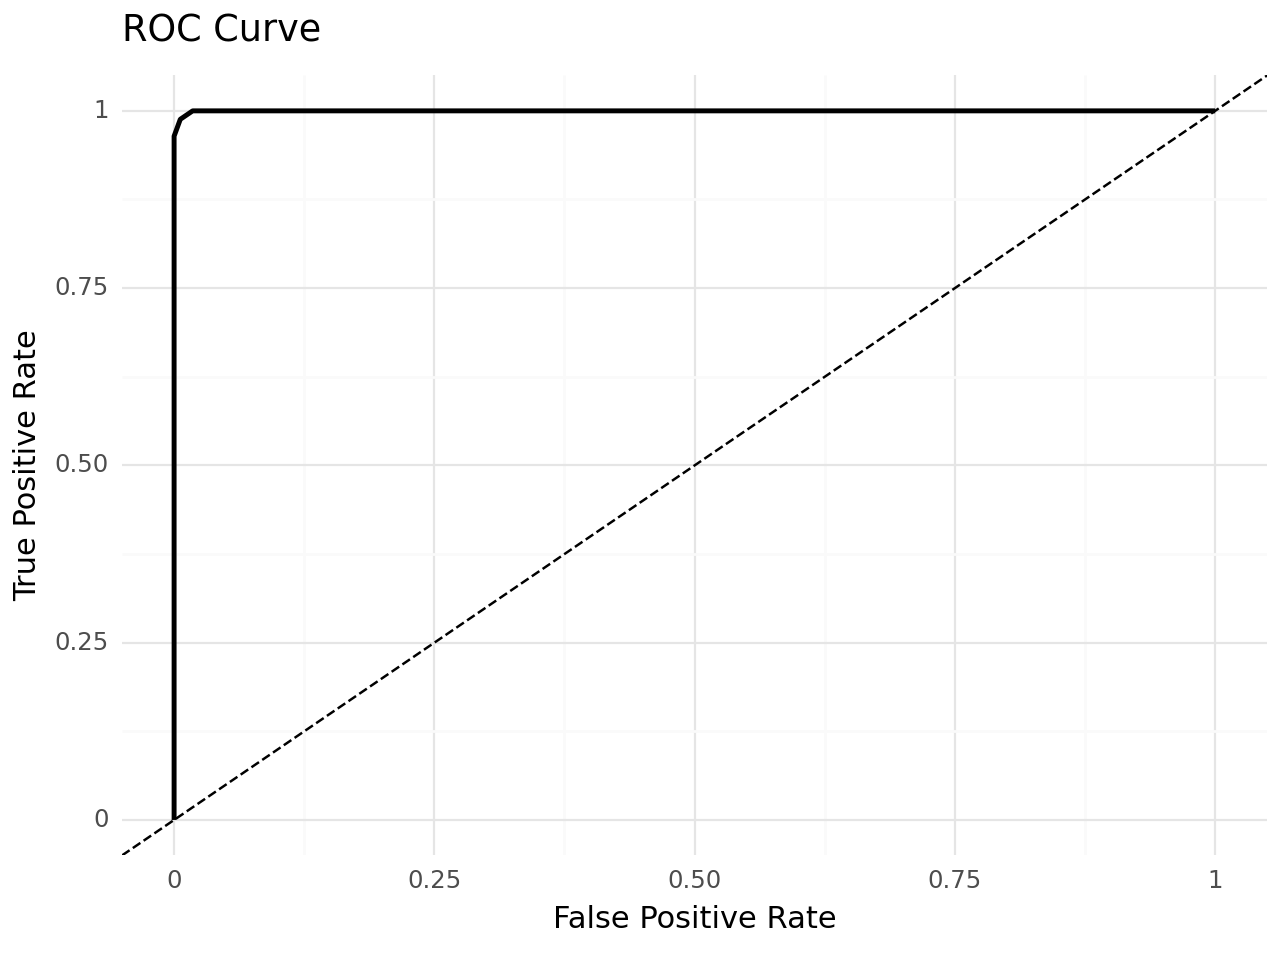

In [ ]:
# Convert species labels to numerical values for ROC curve
y_bin = label_binarize(y_test, classes=knn_pipeline_fitted_1.classes_)

# Get predicted probabilities for each class
y_probs_1 = knn_pipeline_fitted_1.predict_proba(X_test)

# Calculate the ROC curve for each class
fpr, tpr, _ = roc_curve(y_bin.ravel(), y_probs_1.ravel())

# Create a DataFrame for the ROC curve
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Plot the ROC curve using plotnine
roc_plot = (
    ggplot(roc_df, aes(x='FPR', y='TPR')) +
    geom_line(size=1) +
    geom_abline(slope=1, intercept=0, linetype='dashed', color='black') +
    labs(title='ROC Curve', x='False Positive Rate', y='True Positive Rate') +
    theme_minimal()
)

print(roc_plot)

####ROC Curve for Decision Tree

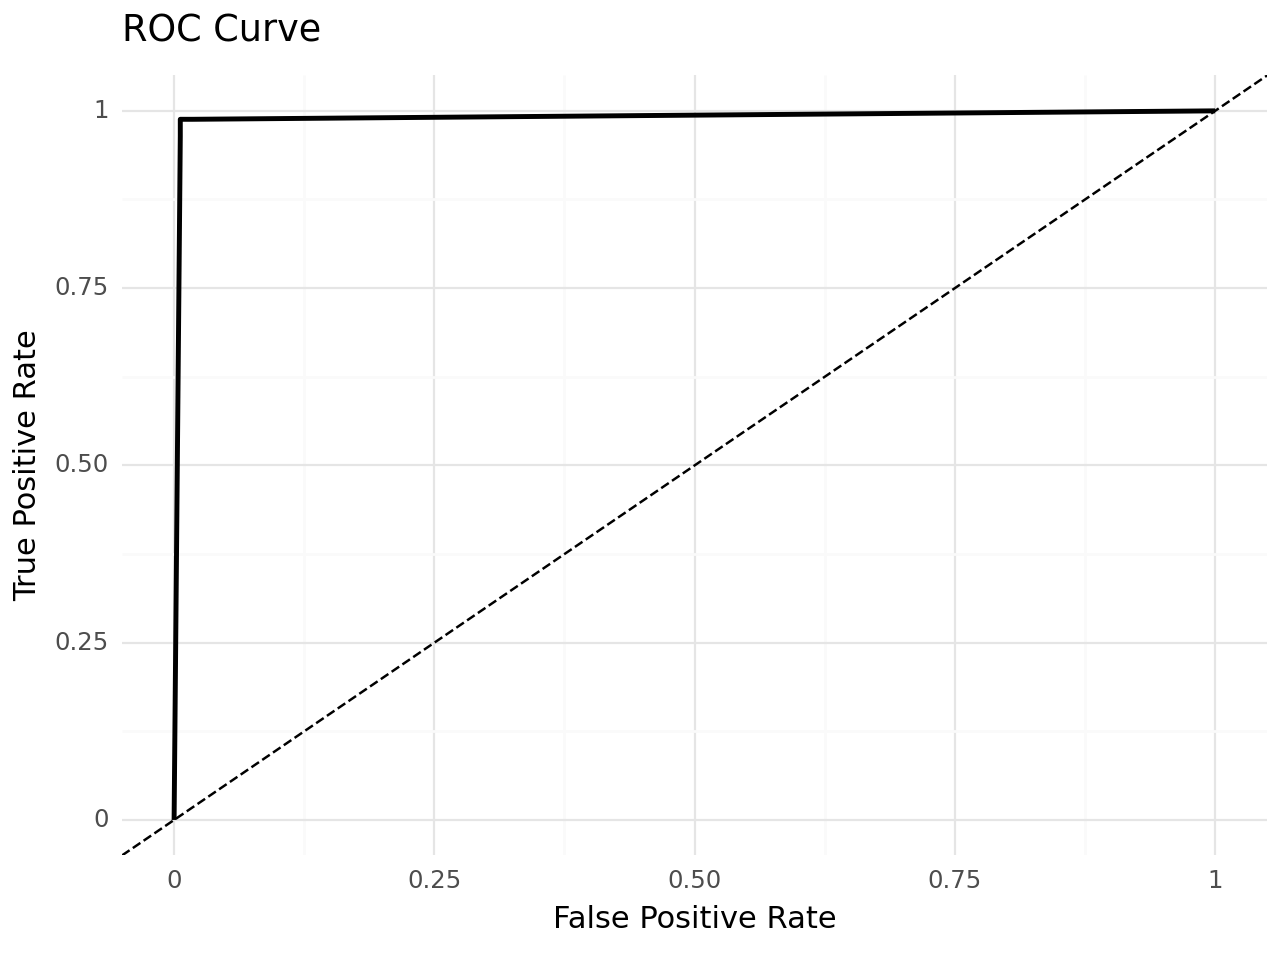

In [ ]:
# Convert species labels to numerical values for ROC curve
y_bin = label_binarize(y_test, classes=decision_tree_pipeline_fitted_1.classes_)

# Get predicted probabilities for each class
y_probs_3 = decision_tree_pipeline_fitted_1.predict_proba(X_test)

# Calculate the ROC curve for each class
fpr, tpr, _ = roc_curve(y_bin.ravel(), y_probs_3.ravel())

# Create a DataFrame for the ROC curve
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Plot the ROC curve using plotnine
roc_plot = (
    ggplot(roc_df, aes(x='FPR', y='TPR')) +
    geom_line(size=1) +
    geom_abline(slope=1, intercept=0, linetype='dashed', color='black') +
    labs(title='ROC Curve', x='False Positive Rate', y='True Positive Rate') +
    theme_minimal()
)

print(roc_plot)